<a href="https://colab.research.google.com/github/Paulina9555/Test/blob/master/cv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie 1.

### a). Wczytaj obrazek z Panią Astronautką i wyświetl go. Pamiętaj o imporcie odpowiednich bibliotek

In [ ]:
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

# doimportuj plt z biblioteki skimage, zaimportuj moduł data, finalnie zaimportuj numpy

In [ ]:
img = data.astronaut()

In [ ]:
print(img)

[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  ...
  [127 120 115]
  [120 117 106]
  [125 119 110]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  ...
  [127 118 112]
  [124 115 108]
  [121 116 105]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  ...
  [128 120 117]
  [126 116 112]
  [124 114 109]]

 ...

 [[186 170 176]
  [186 170 177]
  [183 168 170]
  ...
  [  0   0   0]
  [  0   0   1]
  [  0   0   0]]

 [[183 169 170]
  [182 167 171]
  [185 164 176]
  ...
  [  0   0   1]
  [  1   1   1]
  [  0   0   0]]

 [[184 167 172]
  [183 165 169]
  [180 162 171]
  ...
  [  0   0   0]
  [  1   1   1]
  [  0   0   0]]]


In [ ]:
img.shape

(512, 512, 3)

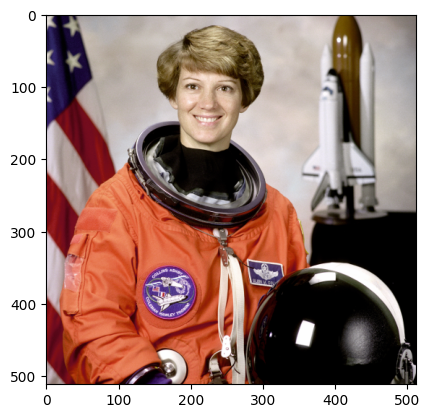

In [ ]:
plt.imshow(img) #Wyświetlanie obrazka
plt.show()

### b) Napisz funkcję show(img) tak abyśmy nie musieli powtarzać więcej powyższego kodu

In [ ]:
def show_img(img):
  plt.imshow(img, cmap = 'gray')
  plt.show()

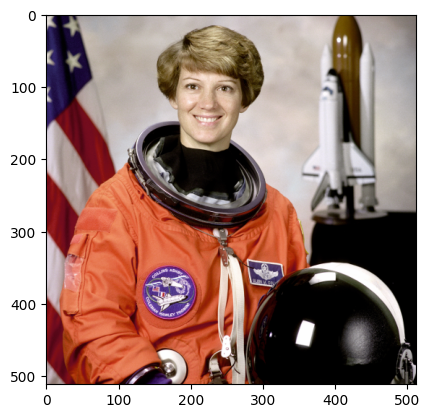

In [ ]:
show_img(img)

### c) Za pomocą biblioteki cv2 przekonwertuj powyższy obraz do szarości. Następnie odwróć tę konwersję. Czy otrzymano ten sam obrazek? Dlaczego?

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

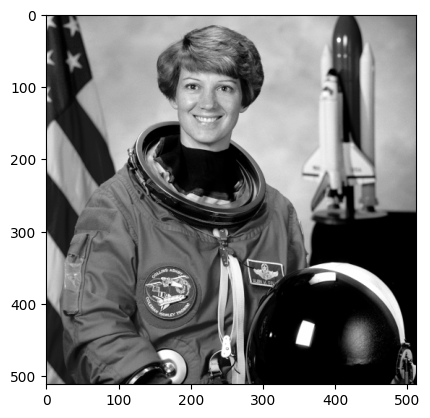

In [ ]:
show_img(img_gray)

In [ ]:
img_gray.shape

(512, 512)

In [ ]:
img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

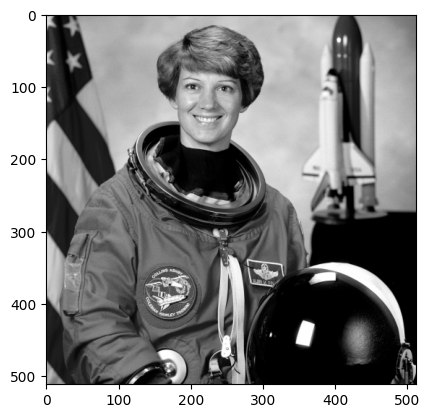

In [ ]:
show_img(img_rgb)

In [ ]:
img_rgb.shape

(512, 512, 3)

# Konwolucje - intro

In [ ]:
def apply_filter(img,kernel):
  new_img = cv2.filter2D(img, -1, kernel)
  show_img(new_img)

In [ ]:
identity_kernel = np.array(([0,0,0],
                            [0,1,0],
                            [0,0,0]))

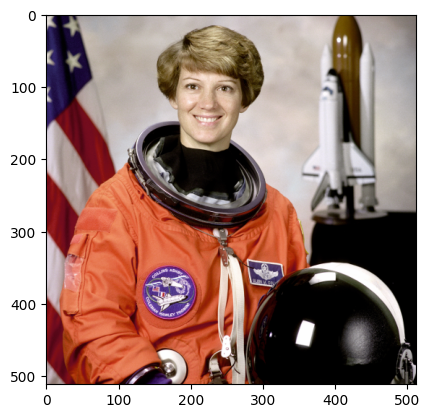

In [ ]:
apply_filter(img, identity_kernel)

# Zadanie 2.

## Sprawdź działanie blur kernela.
### Dodatkowo: nie definiu go wpisując ręcznie jedynki - użyj odpowiedniej metody z numpy

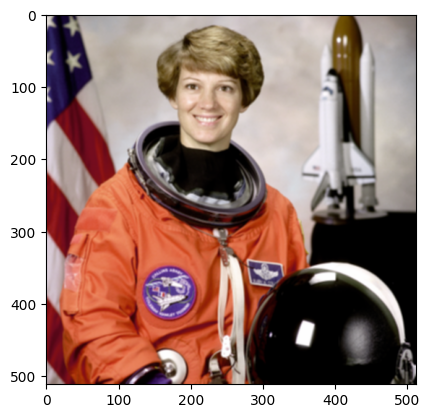

In [ ]:
blur_kernel = np.ones((3,3), np.float32)/9
apply_filter(img, blur_kernel)

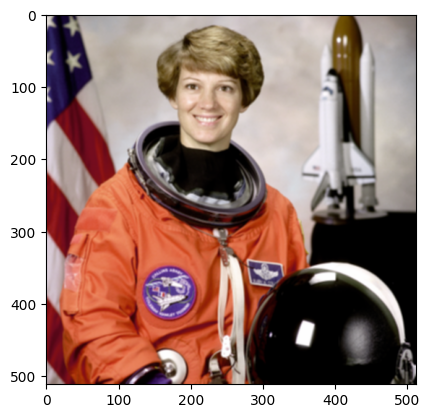

In [ ]:
### Inne rozwiązanie:

kernel_size = (3, 3)
blurred_image = cv2.blur(img, kernel_size, 0)
show_img(blurred_image)

# Zadanie 3

##Wykonaj progowanie na Pani Astronautce. Spróbuj na obrazku kolorowym i szarym.

In [ ]:
ret, img_threshold=cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

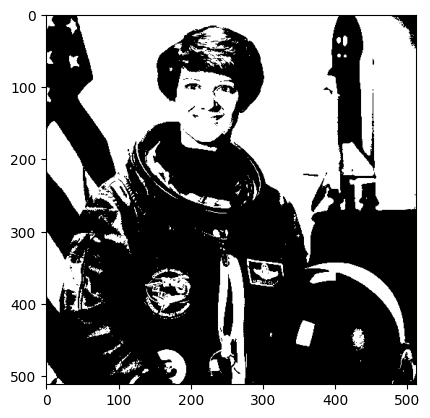

In [ ]:
show_img(img_threshold)

In [ ]:
ret

128.0

### Upewnij się że powyższy obrazek faktycznie jest zprogowany (ma tylko dwie wartości pikseli).

In [ ]:
np.unique(img_threshold)

array([  0, 255], dtype=uint8)

In [ ]:
img_adapt=cv2.adaptiveThreshold(
    img_gray,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11,
    2)

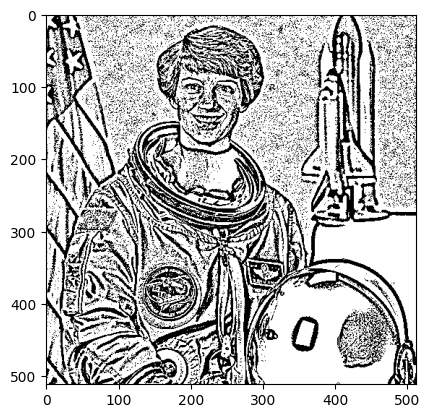

In [ ]:
show_img(img_adapt)

# Zadanie 4.

##Zastosuj i przeanalizuj efekty operatora erozji i dylatacji.

In [ ]:
kernel = np.ones((7,7))

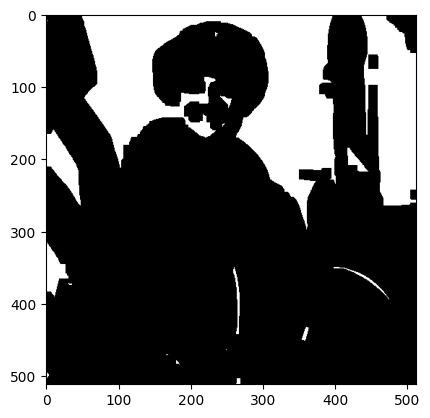

In [ ]:
erosion_img = cv2.erode(img_threshold, kernel, iterations = 2)
show_img(erosion_img)

#Kontury

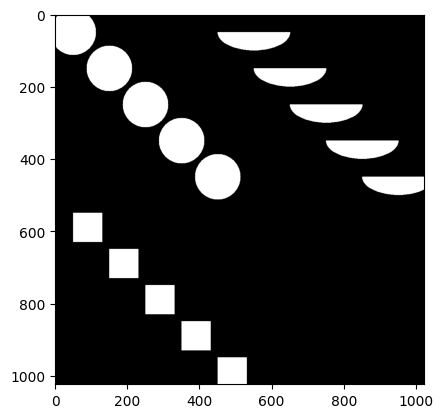

In [ ]:
# Create a black image
img_shapes = np.zeros((1024, 1024, 3), np.uint8)

# Draw multiple circles in white color
for i in range(50, 500, 100):
    cv2.circle(img_shapes, (i, i), 63, (255, 255, 255), -1)

# Draw multiple squares
for i in range(50, 500, 100):
    cv2.rectangle(img_shapes, (i, i+500), (i+80, i+580), (255, 255, 255), -1)

# Draw multiple ellipses
for i in range(50, 500, 100):
    cv2.ellipse(img_shapes, (i+500, i), (100, 50), 0, 0, 180, (255, 255, 255), -1)

plt.imshow(img_shapes)
plt.show()

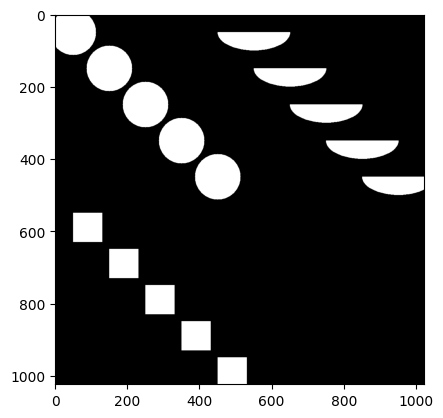

In [ ]:
img_shapes_gray = cv2.cvtColor(img_shapes, cv2.COLOR_RGB2GRAY)
show_img(img_shapes_gray)

In [ ]:
contours, hierarchy = cv2.findContours(img_shapes_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [10,  8, -1, -1],
        [11,  9, -1, -1],
        [12, 10, -1, -1],
        [13, 11, -1, -1],
        [14, 12, -1, -1],
        [-1, 13, -1, -1]]], dtype=int32)

In [ ]:
contours

(array([[[ 450,  950]],
 
        [[ 450, 1023]],
 
        [[ 530, 1023]],
 
        [[ 530,  950]]], dtype=int32),
 array([[[350, 850]],
 
        [[350, 930]],
 
        [[430, 930]],
 
        [[430, 850]]], dtype=int32),
 array([[[250, 750]],
 
        [[250, 830]],
 
        [[330, 830]],
 
        [[330, 750]]], dtype=int32),
 array([[[150, 650]],
 
        [[150, 730]],
 
        [[230, 730]],
 
        [[230, 650]]], dtype=int32),
 array([[[ 50, 550]],
 
        [[ 50, 630]],
 
        [[130, 630]],
 
        [[130, 550]]], dtype=int32),
 array([[[ 850,  450]],
 
        [[ 850,  455]],
 
        [[ 851,  456]],
 
        [[ 851,  458]],
 
        [[ 852,  459]],
 
        [[ 852,  461]],
 
        [[ 853,  462]],
 
        [[ 853,  463]],
 
        [[ 854,  464]],
 
        [[ 854,  465]],
 
        [[ 857,  468]],
 
        [[ 857,  469]],
 
        [[ 865,  477]],
 
        [[ 866,  477]],
 
        [[ 869,  480]],
 
        [[ 870,  480]],
 
        [[ 871,  481]],
 
     

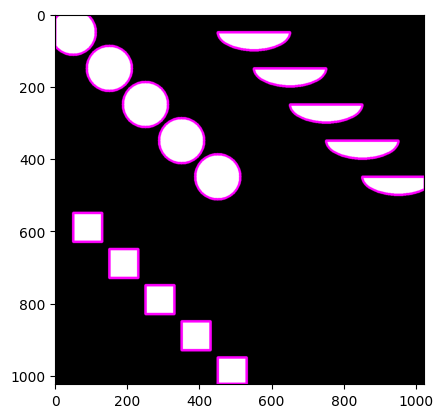

In [ ]:
img_contours_shapes = cv2.drawContours(img_shapes, contours, -1, (255,0,255),5)
plt.imshow(img_contours_shapes, cmap = 'gray')

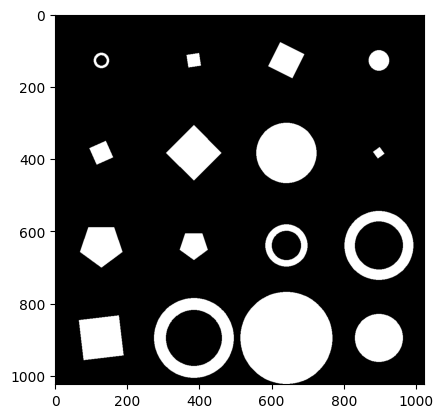

In [ ]:
#@title Stworzenie fajnego img

import numpy as np
import cv2
from matplotlib import pyplot as plt

img_shapes = np.zeros((1024, 1024, 3), np.uint8)
np.random.seed(42)
color = (255, 255, 255)

grid_size = 256
n_rows, n_cols = img_shapes.shape[0] // grid_size, (img_shapes.shape[1] // 2) // grid_size

centers_left = [(i*grid_size + grid_size//2, j*grid_size + grid_size//2) for i in range(n_rows) for j in range(n_cols)]
centers_right = [(i*grid_size + grid_size//2, j*grid_size + grid_size//2 + img_shapes.shape[1]//2) for i in range(n_rows) for j in range(n_cols)]

centers = centers_left + centers_right
np.random.shuffle(centers)

for center in centers:
    shape_type = np.random.choice(['ring', 'ellipse', 'pentagon', 'square'])
    size = np.random.randint(20, grid_size//2)
    center_coordinates = center

    if shape_type == 'ring':
        axes_length = size, size
        inner_axes_length = int(size*0.7), int(size*0.7)
        angle = np.random.randint(0, 360)
        cv2.ellipse(img_shapes, center_coordinates, axes_length, angle, 0, 360, color, -1)
        cv2.ellipse(img_shapes, center_coordinates, inner_axes_length, angle, 0, 360, (0,0,0), -1)

    elif shape_type == 'ellipse':
        axes_length = size, size
        angle = np.random.randint(0, 360)
        cv2.ellipse(img_shapes, center_coordinates, axes_length, angle, 0, 360, color, -1)

    elif shape_type == 'pentagon':
        vertices = np.array([[center_coordinates[0] + size*np.sin(i*2*np.pi/5) for i in range(5)],
                             [center_coordinates[1] + size*np.cos(i*2*np.pi/5) for i in range(5)]]).T
        vertices = vertices.reshape((-1, 1, 2)).astype(np.int32)
        cv2.fillPoly(img_shapes, [vertices], color)

    else:
        vertices = np.array([[center_coordinates[0] - size/2, center_coordinates[1] - size/2],
                             [center_coordinates[0] - size/2, center_coordinates[1] + size/2],
                             [center_coordinates[0] + size/2, center_coordinates[1] + size/2],
                             [center_coordinates[0] + size/2, center_coordinates[1] - size/2]])
        angle = np.random.randint(0, 360)
        rotation_matrix = cv2.getRotationMatrix2D(tuple(center_coordinates), angle, 1)
        vertices = np.dot(vertices, rotation_matrix[:, :2].T) + rotation_matrix[:, 2]
        vertices = vertices.reshape((-1, 1, 2)).astype(np.int32)
        cv2.fillPoly(img_shapes, [vertices], color)

plt.imshow(img_shapes, cmap='gray')
plt.show()


In [ ]:
#@title Konwersja obrazu na odcienie szarości i progowanie
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

gray_shapes = cv2.cvtColor(img_shapes, cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray_shapes,50,255,cv2.THRESH_BINARY)

In [ ]:
#@title Wyszukanie konturów
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
#@title Filtracja konturów i zagnieżdżeń
filtered_contours = []
has_a_child = []
for contour, h in zip(contours, hierarchy[0]):
    if h[3] == -1:
        filtered_contours.append(contour)
        if h[2] != -1:
            has_a_child.append(1)
        else:
            has_a_child.append(0)

In [ ]:
#@title Wyciągnięcie HuMoments z konturów
features_list = []
for contour, child in zip(filtered_contours, has_a_child):
    moments = cv2.moments(contour)
    hu_moments = cv2.HuMoments(moments)
    contour_area = cv2.contourArea(contour)
    arc_length = cv2.arcLength(contour, True)
    if arc_length > 0:
        features = {x: hu[0] for x, hu in enumerate(hu_moments)}
        features['circularity'] = 4 * np.pi * contour_area / arc_length**2
        features['has_child'] = child
        features_list.append(features)

In [ ]:
#@title Przygotowanie DataFrame i normalizacja - konieczne aby uruchomić na tych danych K-Means
df = pd.DataFrame(features_list)
x = df.values
normalizer = preprocessing.Normalizer()
x_scaled = normalizer.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [ ]:
df

0             1             2             3             4  \
0   0.224416  1.485528e-17  2.794517e-10  3.105019e-11  2.148190e-21   
1   0.175453  3.433502e-09  2.041870e-10  6.079174e-14 -1.451287e-25   
2   0.117798  1.826884e-09  4.898258e-12  4.584776e-15  9.255661e-28   
3   0.174319  3.046321e-10  1.700501e-10  3.329769e-16  8.278592e-30   
4   0.203185  5.247372e-07  1.920125e-07  1.567655e-09 -1.821125e-17   
5   0.203029  2.651753e-07  1.021537e-07  2.662592e-09 -3.275082e-17   
6   0.117486  1.517709e-09  2.642930e-09  2.746126e-14  2.399849e-25   
7   0.117799  5.813411e-09  1.087353e-09  3.723824e-16 -1.241635e-28   
8   0.229295  5.817736e-12  1.751604e-07  1.946227e-08  8.266184e-16   
9   0.241161  5.819131e-29  3.811436e-26  3.729492e-26  9.686922e-52   
10  0.208132  2.209861e-10  1.302189e-06  5.788046e-09 -4.024078e-16   
11  0.175262  2.212901e-09  7.192457e-11  4.110847e-15 -1.806151e-27   
12  0.227786  1.755290e-13  3.052309e-08  3.391454e-09  2.526260e-17   
13  0.118697  1.512332e-09  6.419313e-08  7.866651e-12  6.194689e-21   
14  0.175630  4.573925e-08  1.595264e-08  4.883082e-14  1.235279e-24   
15  0.238777  1.453408e-06  1.274178e-10  1.413372e-11 -4.185630e-22   

               5             6         7         8  
0  -1.031374e-19  1.198924e-24  0.974493  0.000000  
1  -3.365879e-18  1.291818e-25  0.984488  0.000000  
2  -1.814196e-19 -7.117442e-29  0.662061  0.740134  
3  -2.515120e-21 -7.186703e-29  0.984689  0.000000  
4  -9.756233e-13  1.174161e-17  0.979140  0.000000  
5  -7.380320e-13 -1.236964e-17  0.979173  0.000000  
6   6.999186e-19 -2.070247e-25  0.664329  0.738149  
7   3.295730e-20  2.950974e-28  0.662064  0.740132  
8  -4.003771e-14 -2.159746e-18  0.973357  0.000000  
9  -2.285995e-40  7.922769e-53  0.970485  0.000000  
10 -7.699812e-14  0.000000e+00  0.978101  0.000000  
11  1.771923e-19  9.265153e-28  0.984522  0.000000  
12 -1.215779e-15  1.394313e-19  0.973711  0.000000  
13  3.307783e-16 -4.225984e-21  0.655880  0.745475  
14  9.942426e-18 -5.543657e-32  0.984456  0.000000  
15 -1.423510e-14  9.798416e-24  0.971075  0.000000

In [ ]:
#@title Klasteryzacja k-means
kmeans = KMeans(n_clusters=4, random_state=42).fit(df)
print(kmeans.labels_)

[1 2 0 2 3 3 0 0 1 1 3 2 1 0 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


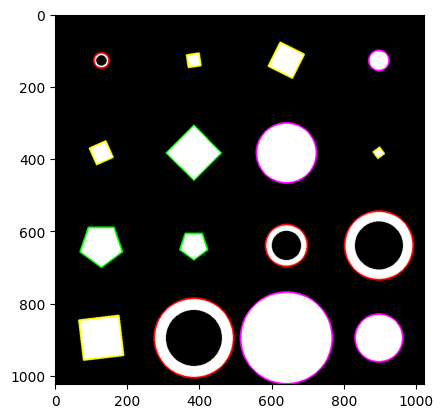

In [ ]:
#@title Wizualizacja wyników
colors = [(255,0,0), (255,255,0), (255,0,255), (0,255,0), (0,255,255), (0,0,255)]
for contour, label in zip(filtered_contours, kmeans.labels_):
    img_shapes = cv2.drawContours(img_shapes, [contour], -1, colors[label], 3)

plt.imshow(img_shapes)
plt.show()

#Powtórka z sieci neuronowych

####Zadanie 1. Napisz prosty klasyfikator za pomocą sieci neuronowej na datasecie MNIST. Użyj biblioteki Keras

In [ ]:
# Podpunkt 1: Import bibliotek.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Zaimportuj: dataset MNIST, Sequential, Dense, Flatten oraz metodę to_categorical.

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical

In [ ]:
# Zaciągnij dataset MNIST zgodnie z "procedurą" datasetów z Kerasa.

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Metoda: .nazwa funkcji.
# Metodą od funkcji odróżnia to że metoda jest wykonywana na obiekcie a funkcja
# przyjmuje obiekt jako argument.

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Wykonaj mikro-EDA(a) - wyświetl coś, sprawdź ile jest klas, jaki kształt mają dane,
# czy klasy są zbalansowane itd.

In [ ]:
x_train.shape

# Oznacza to że mamy 60000 zdjęć o rozmiarach 28x28. Zdjecia te są czarno-białe.

(60000, 28, 28)

In [ ]:
from collections import Counter

count = Counter(y_train)
count

# Mamy 9 zbalansowanych klas (mniej/wiecej tyle samo argumentów w każdej klasie).

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

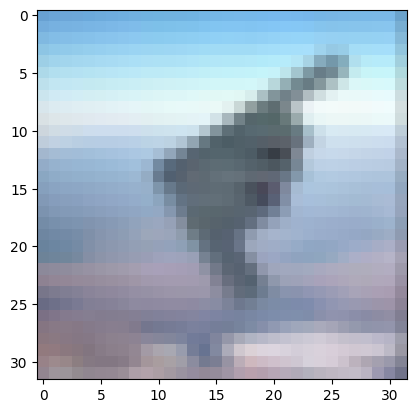

In [ ]:
def show_img(img):
  plt.imshow(img, cmap = 'gray')
  plt.show()

show_img(x_train[4567])

In [ ]:
# Sprawdź czy dane są znormalizowane (skierowane na przedział 0-1).

# Wzór na normalizacje: x -> (x - min) / (max - min)

In [ ]:
np.min(x_train)

0

In [ ]:
np.max(x_train)

255

In [ ]:
# Na początku splituje sie dane, potem się je normalizuje.
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# Zamień zbiory etykiet na zbiory wektorów należenia do klasy:

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
# Stwórz model sieci która przyjmie nasz obrazek (28,28) oraz odpowiednio go spłaszczy.
# Dołóż do niej trzy warstwy gęste wielkości 512, 256, 128 a następnie zwróci wektor
# prawdopodobieństw z softmaxem. Sam/sama dobierz funkcje aktywacji. Powiedz jakie mają
# własności oraz wady.

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
model = Sequential([
            Flatten(input_shape = (28,28)),
            Dense(512, activation='relu'),
            Dense(256, activation='relu'),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
])


In [ ]:
# 1. Compile, fit, evaluate - zainicjalizuj, wytrenuj i sprawdź w boju swój model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
118/118 [==============================] - 5s 33ms/step - loss: 0.3528 - accuracy: 0.9028
Epoch 2/10
118/118 [==============================] - 4s 32ms/step - loss: 0.1199 - accuracy: 0.9640
Epoch 3/10
118/118 [==============================] - 8s 66ms/step - loss: 0.0788 - accuracy: 0.9763
Epoch 4/10
118/118 [==============================] - 4s 32ms/step - loss: 0.0542 - accuracy: 0.9837
Epoch 5/10
118/118 [==============================] - 4s 32ms/step - loss: 0.0373 - accuracy: 0.9888
Epoch 6/10
118/118 [==============================] - 6s 50ms/step - loss: 0.0287 - accuracy: 0.9909
Epoch 7/10
118/118 [==============================] - 4s 32ms/step - loss: 0.0194 - accuracy: 0.9945
Epoch 8/10
118/118 [==============================] - 4s 32ms/step - loss: 0.0145 - accuracy: 0.9954
Epoch 9/10
118/118 [==============================] - 5s 42ms/step - loss: 0.0168 - accuracy: 0.9945
Epoch 10/10
118/118 [==============================] - 5s 40ms/step - loss: 0.0109 - accura

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0666 - accuracy: 0.9815


[0.0665607824921608, 0.9815000295639038]

# Konwolucyjne sieci neuronowe

####Zadanie 1. Napisz sieć konwolucyjną na zbiorze MNIST.

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical

# nowe importy:
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Nowe dla CNN:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
model = Sequential([
    Conv2D(8, (3,3,), activation='relu', input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dropout(0.25),
    Dense(10, activation = 'softmax'),
])

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=512, epochs=10)

Epoch 1/10
118/118 [==============================] - 13s 100ms/step - loss: 3.6896 - accuracy: 0.6049
Epoch 2/10
118/118 [==============================] - 14s 115ms/step - loss: 0.7110 - accuracy: 0.8086
Epoch 3/10
118/118 [==============================] - 13s 110ms/step - loss: 0.4988 - accuracy: 0.8612
Epoch 4/10
118/118 [==============================] - 12s 105ms/step - loss: 0.3869 - accuracy: 0.8908
Epoch 5/10
118/118 [==============================] - 12s 101ms/step - loss: 0.3204 - accuracy: 0.9093
Epoch 6/10
118/118 [==============================] - 11s 92ms/step - loss: 0.2621 - accuracy: 0.9243
Epoch 7/10
118/118 [==============================] - 12s 104ms/step - loss: 0.2311 - accuracy: 0.9317
Epoch 8/10
118/118 [==============================] - 12s 103ms/step - loss: 0.1969 - accuracy: 0.9398
Epoch 9/10
118/118 [==============================] - 12s 103ms/step - loss: 0.1794 - accuracy: 0.9451
Epoch 10/10
118/118 [==============================] - 11s 92ms/step - los

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1433 - accuracy: 0.9663


[0.14330995082855225, 0.9663000106811523]

#### Zadanie 2. Dla zbioru cifar10 utwórz model sieci klasycznej oraz konwolucyjnej, pobaw się tym.

#### Propozycja: dla MLP stwórz warstwy 512, 256, 128, 10, batch size ustaw na 128, epok 10

In [ ]:
# Import obrazka
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
np.min(x_train)

0

In [ ]:
np.max(x_train)

255

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# Podział danych na treningowe i testowe
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Rozmiar x treningowego
x_train.shape

(50000, 32, 32, 3)

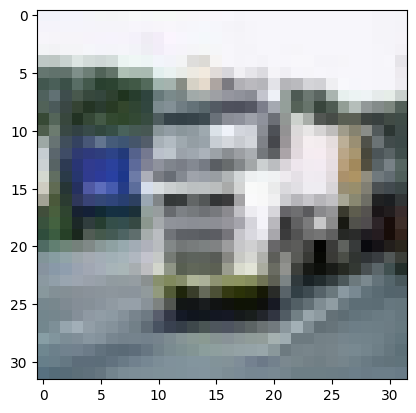

In [ ]:
show_img(x_train[1000])

In [ ]:
# Model sieci MLP:

model = Sequential([
            Flatten(input_shape = (32,32,3)),
            Dense(512, activation='relu'),
            Dense(256, activation='relu'),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Kompilacja sieci MLP:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Dopasowywanie sieci MLP:
# history=model.fit(...) - dobrze to zapisywać żeby mieć trening w historii zapamiętany.
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 20s 48ms/step - loss: 1.8891 - accuracy: 0.3153
Epoch 2/10
391/391 [==============================] - 16s 40ms/step - loss: 1.6823 - accuracy: 0.3945
Epoch 3/10
391/391 [==============================] - 16s 40ms/step - loss: 1.5911 - accuracy: 0.4303
Epoch 4/10
391/391 [==============================] - 16s 41ms/step - loss: 1.5435 - accuracy: 0.4494
Epoch 5/10
391/391 [==============================] - 16s 41ms/step - loss: 1.4987 - accuracy: 0.4644
Epoch 6/10
391/391 [==============================] - 17s 44ms/step - loss: 1.4568 - accuracy: 0.4784
Epoch 7/10
391/391 [==============================] - 16s 42ms/step - loss: 1.4292 - accuracy: 0.4891
Epoch 8/10
391/391 [==============================] - 16s 41ms/step - loss: 1.3979 - accuracy: 0.5019
Epoch 9/10
391/391 [==============================] - 16s 40ms/step - loss: 1.3677 - accuracy: 0.5119
Epoch 10/10
391/391 [==============================] - 16s 40ms/step - loss: 1.345

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4198 - accuracy: 0.4956


[1.4197520017623901, 0.49559998512268066]

##### Model CNN dla cifar10

In [ ]:
model = Sequential([
    Conv2D(32, (3,3,), padding='same', activation='relu', input_shape = (32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3),padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=256, epochs=40)

Epoch 1/40


ValueError: ignored

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 27ms/step - loss: 2.0951 - accuracy: 0.7439


[2.095118522644043, 0.7439000010490417]

##Zadanie 3. Wykonaj task cifar100 używajac CNN. Dodatkowo wydziel zbiór walidacyjny aby móc zmieniać swój model bez przecieku danych.

######HINT: Wykorzystaj train_test_split na tupli (x_train, y_train)

In [ ]:
from keras.datasets import cifar100

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
len(x_train)

50000

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size = 0.1,
                                                  random_state=1)

In [ ]:
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
x_train.shape

(45000, 32, 32, 3)

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (32,32,3)),
    MaxPooling2D(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3,3),padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(256, (3,3),padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=50,
    validation_data=(X_val, y_val)
)

Epoch 1/50


ValueError: ignored

In [ ]:
model.evaluate(X_test, y_test)

ValueError: ignored

In [ ]:
df=pd.DataFrame(history.history)
df=[['loss', 'val_loss', ]]

#Data Augumentation

In [ ]:
def show_img(img):
  plt.imshow(img)
  plt.show()

In [ ]:
import imgaug.augmenters as ia
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt

In [ ]:
img = data.astronaut()

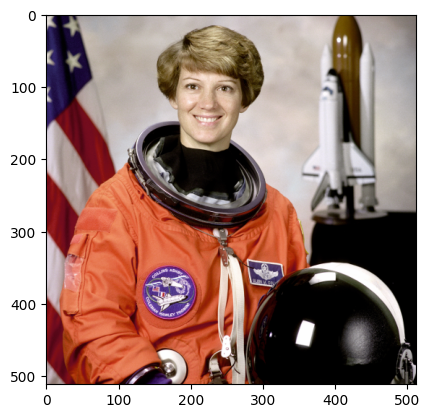

In [ ]:
show_img(img)

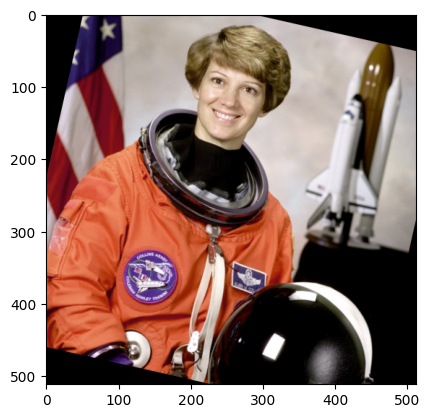

In [ ]:
rotation = ia.Rotate((-45, 45), seed = 42)
rot_img = rotation(image=img)
show_img(rot_img)

##Zadanie 1. Za pomocą imgaug przeskaluj Panią Astronautkę z paramterem (0.5, 1.5)

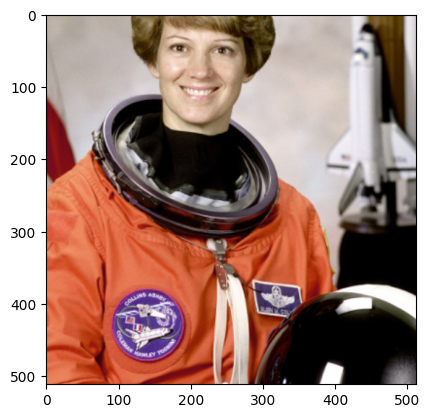

In [ ]:
scale =ia.Affine(scale=(0.5, 1.5))
scale_img = scale(image=img)
show_img(scale_img)

##Zadanie 2. Za pomocą funkcji imgaug.Sequential zdefiniuj następującą transformację:
###1. Przekształcenie afiniczne (samo skalowanie).
###2. Rotacja.
###3. Translacja (dowolna).
###4. Dowolna wybrana przez Ciebie (inna niż wyżej).

In [ ]:
import imgaug.augmenters as iaa

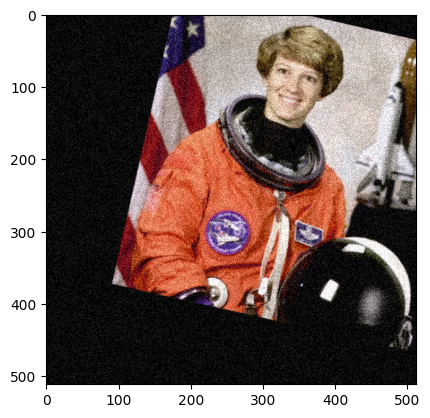

In [ ]:
scale =ia.Affine(scale=(0.5, 1.5))
rotation = ia.Rotate((-45, 45), seed = 42)
translation = ia.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)})
add = ia.AddElementwise((-40, 40))


scaled_img = scale(image = img)
rot_img = rotation(image = scaled_img)
translated_img = translation(image = rot_img)
added_img = add(image = translated_img)


show_img(added_img)

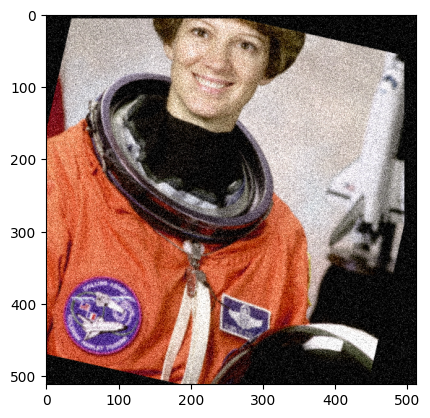

In [ ]:
aug = ia.Sequential([
    ia.Affine(scale=(0.5, 1.5), seed=42),
    ia.Affine(rotate=(-45,45), seed=42),
    ia.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, seed=42),
    ia.AdditiveGaussianNoise(scale=0.1*255, seed=42),
])
img_transformed = aug(image=img)
show_img(img_transformed)

<function matplotlib.pyplot.show(close=None, block=None)>

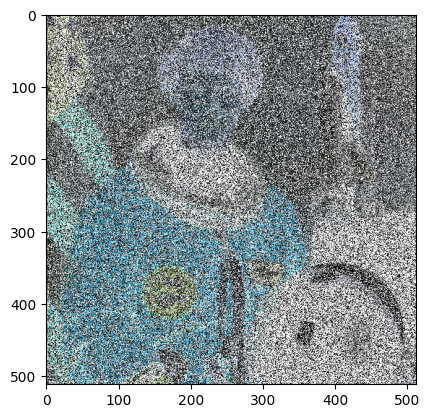

In [ ]:
seq = ia.Sequential([
    ia.SaltAndPepper(0.7),
    ia.Invert(0.7)
])

seq_img = seq(image = img)
plt.imshow(seq_img)
plt.show

## Zadanie 3. Za pomocą cv2 narzuć na twarz Pani Astronautki bounding box

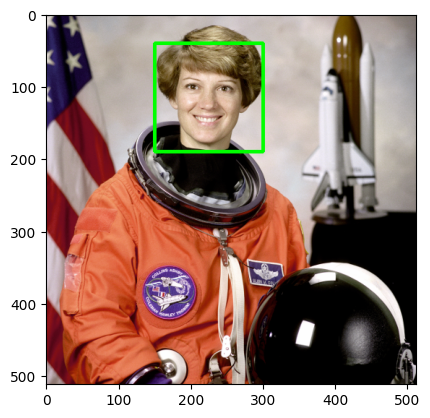

In [ ]:
img = data.astronaut()
x,y,w,h = 150,40,150,150

boxed_img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 4)
show_img(boxed_img)

# Transfer Learning + Fine Tuning

##Zadanie 1. Przeprowadź proces klasyfikacji na zbiorze cifar100 wykorzystując EfficientNetB0

In [ ]:
from keras.layers import Dense, Flatten, Conv2D, Input
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.applications import EfficientNetB0

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.8, random_state=42)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

y_train = y_train.reshape(50000,1,1,100)
y_val = y_val.reshape(8000,1,1,100)
y_test = y_test.reshape(2000,1,1,100)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(50000, 1, 1, 100)
(8000, 1, 1, 100)
(2000, 1, 1, 100)


In [ ]:
efficient_net = EfficientNetB0(include_top = False)
efficient_net.trainable = False #Zamrożenie modelu

In [ ]:
input_layer = Input(shape = (32,32,3))
efficient_layer = efficient_net(input_layer)
output_layer = Dense(100, activation = 'softmax')(efficient_layer)

model = Model(input_layer, output_layer)

In [ ]:
model.compile(optimizer= 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy', 'AUC'])

In [ ]:
model.fit(x_train, y_train, batch_size = 512, epochs = 10)

Epoch 1/10
98/98 [==============================] - 22s 39ms/step - loss: 4.6343 - accuracy: 0.0099 - auc: 0.4997
Epoch 2/10
98/98 [==============================] - 4s 37ms/step - loss: 4.6149 - accuracy: 0.0099 - auc: 0.4978
Epoch 3/10
98/98 [==============================] - 4s 37ms/step - loss: 4.6101 - accuracy: 0.0104 - auc: 0.4976
Epoch 4/10
98/98 [==============================] - 4s 38ms/step - loss: 4.6087 - accuracy: 0.0102 - auc: 0.4985
Epoch 5/10
98/98 [==============================] - 4s 37ms/step - loss: 4.6092 - accuracy: 0.0107 - auc: 0.4973
Epoch 6/10
98/98 [==============================] - 4s 37ms/step - loss: 4.6086 - accuracy: 0.0098 - auc: 0.4992
Epoch 7/10
98/98 [==============================] - 4s 39ms/step - loss: 4.6083 - accuracy: 0.0104 - auc: 0.4999
Epoch 8/10
98/98 [==============================] - 4s 37ms/step - loss: 4.6094 - accuracy: 0.0095 - auc: 0.4966
Epoch 9/10
98/98 [==============================] - 4s 36ms/step - loss: 4.6091 - accuracy: 0.0

In [ ]:
efficient_net.trainable = True # Odmrożenie modelu

from keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy', 'AUC'])

In [ ]:
model.fit(x_train,
          y_train,
          batch_size = 64,
          epochs = 50,
          validation_data = (x_val, y_val))

Epoch 1/50
782/782 [==============================] - 83s 58ms/step - loss: 4.3467 - accuracy: 0.0690 - auc: 0.6782 - val_loss: 5.4690 - val_accuracy: 0.0125 - val_auc: 0.5132
Epoch 2/50
782/782 [==============================] - 41s 53ms/step - loss: 3.4324 - accuracy: 0.1893 - auc: 0.8497 - val_loss: 6.9136 - val_accuracy: 0.0199 - val_auc: 0.5576
Epoch 3/50
782/782 [==============================] - 43s 56ms/step - loss: 2.9184 - accuracy: 0.2770 - auc: 0.8994 - val_loss: 5.7969 - val_accuracy: 0.0445 - val_auc: 0.6102
Epoch 4/50
782/782 [==============================] - 44s 57ms/step - loss: 2.5615 - accuracy: 0.3440 - auc: 0.9258 - val_loss: 3.7330 - val_accuracy: 0.1655 - val_auc: 0.8145
Epoch 5/50
782/782 [==============================] - 44s 56ms/step - loss: 2.3011 - accuracy: 0.3966 - auc: 0.9411 - val_loss: 6.1621 - val_accuracy: 0.0530 - val_auc: 0.6123
Epoch 6/50
782/782 [==============================] - 44s 56ms/step - loss: 2.0741 - accuracy: 0.4454 - auc: 0.9524 - va

In [ ]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 6s 29ms/step - loss: 7.3735 - accuracy: 0.1325 - auc: 0.6582


[7.373475551605225, 0.13249999284744263, 0.658191978931427]